In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
diabetes.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [10]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


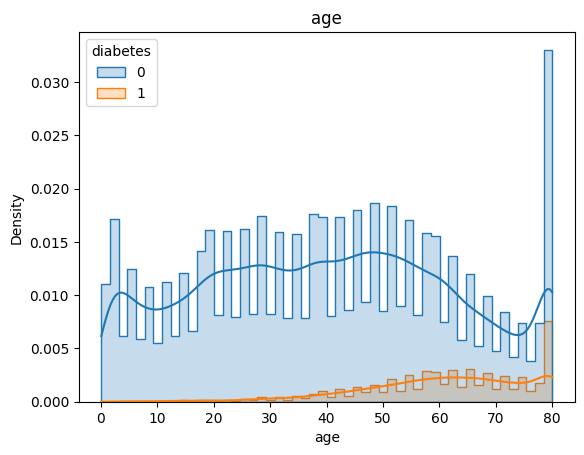

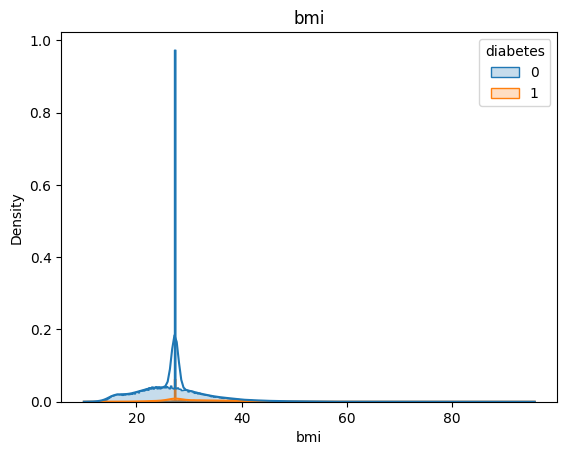

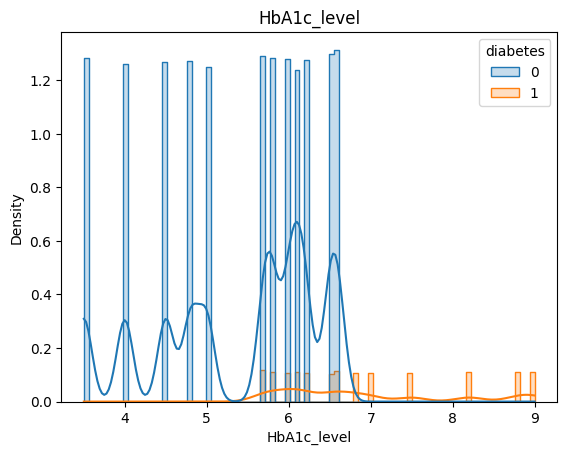

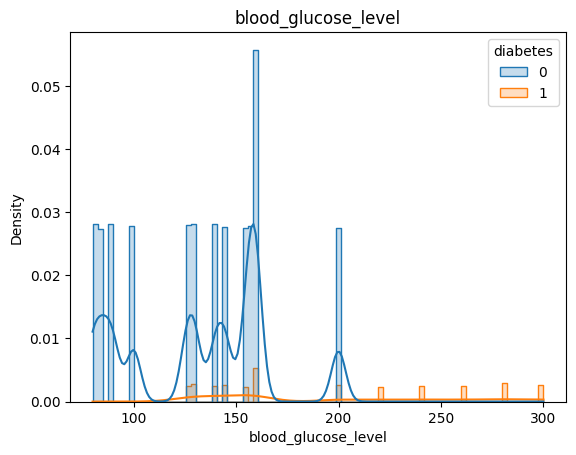

In [11]:
for column in ['age', 'bmi' ,'HbA1c_level', 'blood_glucose_level']:
    sns.histplot(data=diabetes, x=column, hue="diabetes", kde=True, element="step", stat="density")
    plt.title(f'{column}')
    plt.show()

In [ ]:
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [12]:
diabetes['gender'] = diabetes['gender'].map({'Male': 1, 'Female': 0})

In [13]:
diabetes = diabetes.dropna()

In [14]:
diabetes['smoking_history'] = diabetes['smoking_history'].apply(lambda x: 1 if x in ('current', 'ever', 'former') else 0)

In [15]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  float64
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   smoking_history      99982 non-null  int64  
 5   bmi                  99982 non-null  float64
 6   HbA1c_level          99982 non-null  float64
 7   blood_glucose_level  99982 non-null  int64  
 8   diabetes             99982 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 7.6 MB


In [3]:
diabetes["diabetes"].value_counts()

,count
diabetes,
0,91500
1,8500


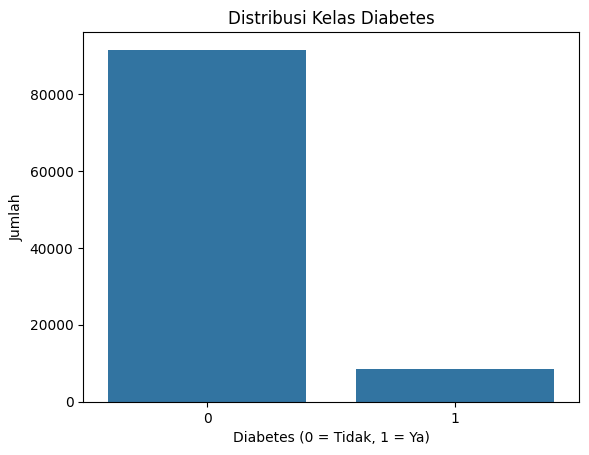

In [25]:
sns.countplot(data=diabetes, x="diabetes")
plt.title("Distribusi Kelas Diabetes")
plt.xlabel("Diabetes (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah")
plt.show()


<h1> Split

In [16]:
X = diabetes.drop(columns=['diabetes'])
y = diabetes['diabetes']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Scale hanya fitur kontinu
continuous_features =  ['age', 'bmi' ,'HbA1c_level', 'blood_glucose_level']

X_train_continuous = X_train[continuous_features]
X_train_other = X_train.drop(columns=continuous_features)

X_test_continuous = X_test[continuous_features]
X_test_other = X_test.drop(columns=continuous_features)

scaler = RobustScaler()

X_train_cont_scaled = scaler.fit_transform(X_train_continuous)

X_test_cont_scaled = scaler.transform(X_test_continuous)


X_train_cont_scaled = pd.DataFrame(X_train_cont_scaled, columns=continuous_features, index=X_train.index)
X_test_cont_scaled = pd.DataFrame(X_test_cont_scaled, columns=continuous_features, index=X_test.index)

X_train_final = pd.concat([X_train_cont_scaled, X_train_other], axis=1)
X_test_final = pd.concat([X_test_cont_scaled, X_test_other], axis=1)

#SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train.reset_index(drop=True))




In [26]:
from collections import Counter

print("Distribusi kelas sebelum SMOTE:", Counter(y_train))
print("Distribusi kelas setelah SMOTE:", Counter(y_train_resampled))

Distribusi kelas sebelum SMOTE: Counter({0: 73260, 1: 6725})
Distribusi kelas setelah SMOTE: Counter({0: 73260, 1: 73260})


In [19]:
joblib.dump(scaler, 'scaler-diabetes.pkl')


['scaler-diabetes.pkl']

<h1> Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_resampled, y_train_resampled)

y_pred = rf_model.predict(X_test_final)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.4f}")

print(classification_report(y_test, y_pred))


Akurasi: 0.9580
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     18222
           1       0.78      0.74      0.76      1775

    accuracy                           0.96     19997
   macro avg       0.88      0.86      0.87     19997
weighted avg       0.96      0.96      0.96     19997



<h1> Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_resampled, y_train_resampled)
y_pred = lr_model.predict(X_test_final)

print("Logistic Regression")
print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


Logistic Regression
Akurasi: 0.8877
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18222
           1       0.43      0.89      0.58      1775

    accuracy                           0.89     19997
   macro avg       0.71      0.89      0.76     19997
weighted avg       0.94      0.89      0.90     19997



<h1> XGB

In [22]:
from xgboost import XGBClassifier
# Tidak perlu SMOTE cukup gunakan scale_pos_weight

xgb = XGBClassifier(scale_pos_weight = 10 , random_state=42)  #
xgb.fit(X_train_final, y_train)
y_pred = xgb.predict(X_test_final)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.93      0.96     18222
           1       0.54      0.88      0.67      1775

    accuracy                           0.92     19997
   macro avg       0.76      0.91      0.81     19997
weighted avg       0.95      0.92      0.93     19997



<h1> Save Random Forest Model

In [23]:
joblib.dump(rf_model, 'rf_model_diabetes.pkl')

['rf_model_diabetes.pkl']